In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics  import confusion_matrix, accuracy_score, precision_score, recall_score

In [2]:
breast_cancer = load_breast_cancer()

In [3]:
breast_cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
breast_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
df['target'] = breast_cancer.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [7]:
wf = [col for col in df.columns if 'worst'in col]
wf

['worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

In [8]:
sum = wf +['target']
sum

['worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension',
 'target']

In [9]:
df = df[sum]
df

,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...
564,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [10]:
df.columns = df.columns.str.replace('worst ', '')
df

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal dimension,target
0,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...
564,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [11]:
val_target_s = df['target'].value_counts()

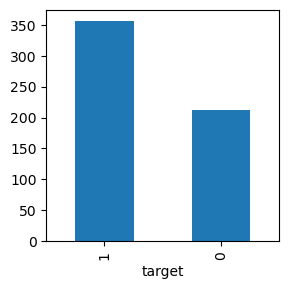

In [12]:
val_target_s.plot(kind='bar', figsize=(3, 3))
plt.show()

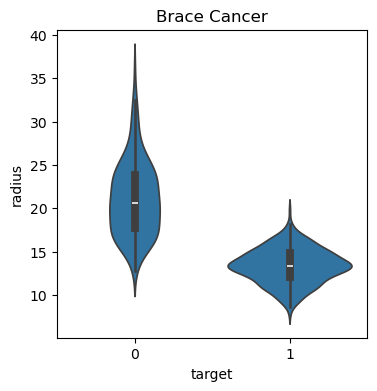

In [13]:
plt.figure(figsize=(4, 4))
sns.violinplot(x='target', y='radius', data=df, )
plt.title('Brace Cancer')
plt.show()

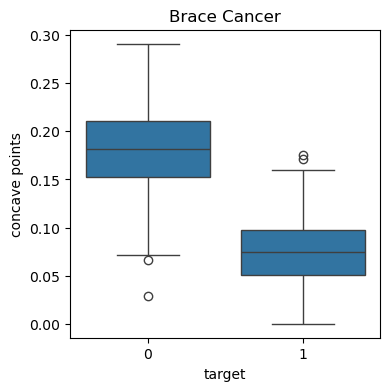

In [14]:
plt.figure(figsize=(4, 4))
sns.boxplot(x='target', y='concave points', data=df, )
plt.title('Brace Cancer')
plt.show()

In [15]:
df.corr()

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal dimension,target
radius,1.000000,0.359921,0.993708,0.984015,0.216574,0.475820,0.573975,0.787424,0.243529,0.093492,-0.776454
texture,0.359921,1.000000,0.365098,0.345842,0.225429,0.360832,0.368366,0.359755,0.233027,0.219122,-0.456903
perimeter,0.993708,0.365098,1.000000,0.977578,0.236775,0.529408,0.618344,0.816322,0.269493,0.138957,-0.782914
area,0.984015,0.345842,0.977578,1.000000,0.209145,0.438296,0.543331,0.747419,0.209146,0.079647,-0.733825
smoothness,0.216574,0.225429,0.236775,0.209145,1.000000,0.568187,0.518523,0.547691,0.493838,0.617624,-0.421465
compactness,0.475820,0.360832,0.529408,0.438296,0.568187,1.000000,0.892261,0.801080,0.614441,0.810455,-0.590998
concavity,0.573975,0.368366,0.618344,0.543331,0.518523,0.892261,1.000000,0.855434,0.532520,0.686511,-0.659610
concave points,0.787424,0.359755,0.816322,0.747419,0.547691,0.801080,0.855434,1.000000,0.502528,0.511114,-0.793566
symmetry,0.243529,0.233027,0.269493,0.209146,0.493838,0.614441,0.532520,0.502528,1.000000,0.537848,-0.416294
fractal dimension,0.093492,0.219122,0.138957,0.079647,0.617624,0.810455,0.686511,0.511114,0.537848,1.000000,-0.323872


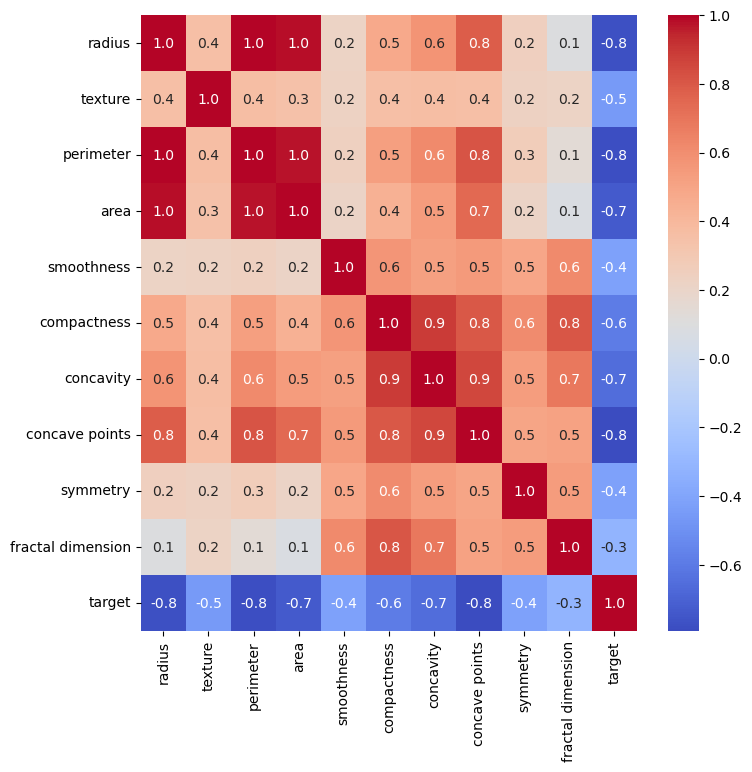

In [16]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, fmt='.1f', cmap='coolwarm')
plt.show()

In [17]:
df = df.drop(columns=['radius', 'area', 'concavity'])
df

,texture,perimeter,smoothness,compactness,concave points,symmetry,fractal dimension,target
0,17.33,184.60,0.16220,0.66560,0.2654,0.4601,0.11890,0
1,23.41,158.80,0.12380,0.18660,0.1860,0.2750,0.08902,0
2,25.53,152.50,0.14440,0.42450,0.2430,0.3613,0.08758,0
3,26.50,98.87,0.20980,0.86630,0.2575,0.6638,0.17300,0
4,16.67,152.20,0.13740,0.20500,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...
564,26.40,166.10,0.14100,0.21130,0.2216,0.2060,0.07115,0
565,38.25,155.00,0.11660,0.19220,0.1628,0.2572,0.06637,0
566,34.12,126.70,0.11390,0.30940,0.1418,0.2218,0.07820,0
567,39.42,184.60,0.16500,0.86810,0.2650,0.4087,0.12400,0


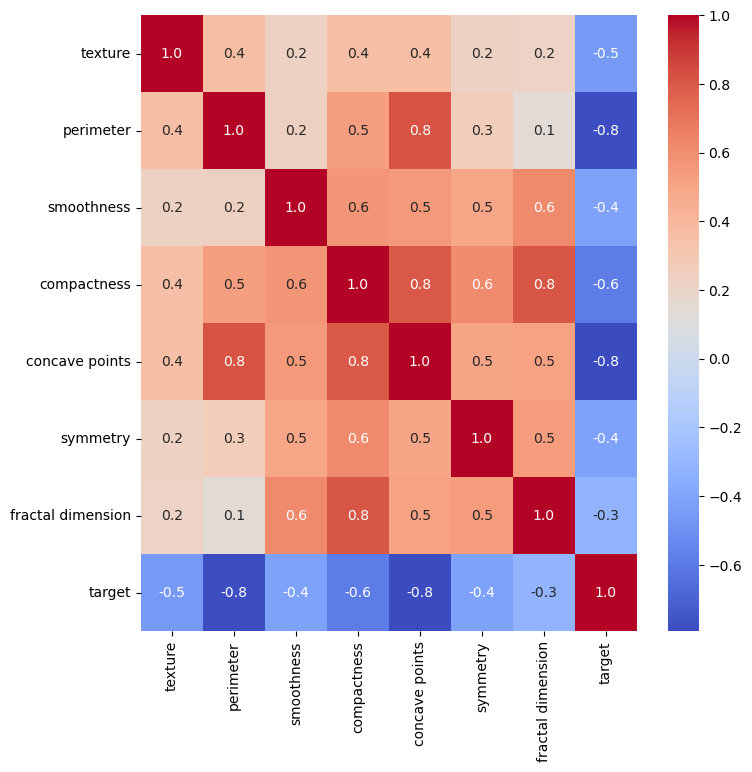

In [18]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, fmt='.1f', cmap='coolwarm')
plt.show()

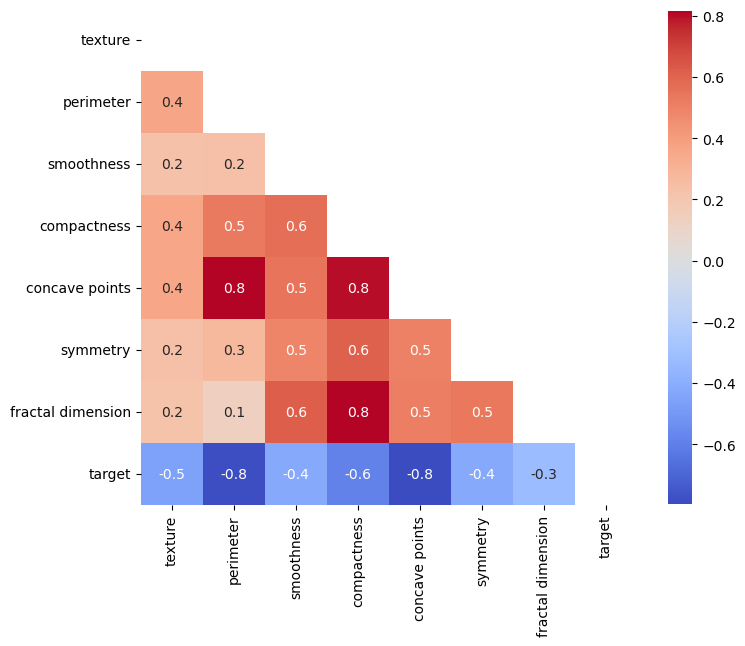

In [19]:
# Lower Triangle
corr = df.corr()

# Upper Triangle
Lower_Triangle = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(8, 8))
sns.heatmap(corr, mask=Lower_Triangle, annot=True, fmt='.1f',  cmap='coolwarm', square=True, cbar_kws={'shrink': .8})
plt.show()

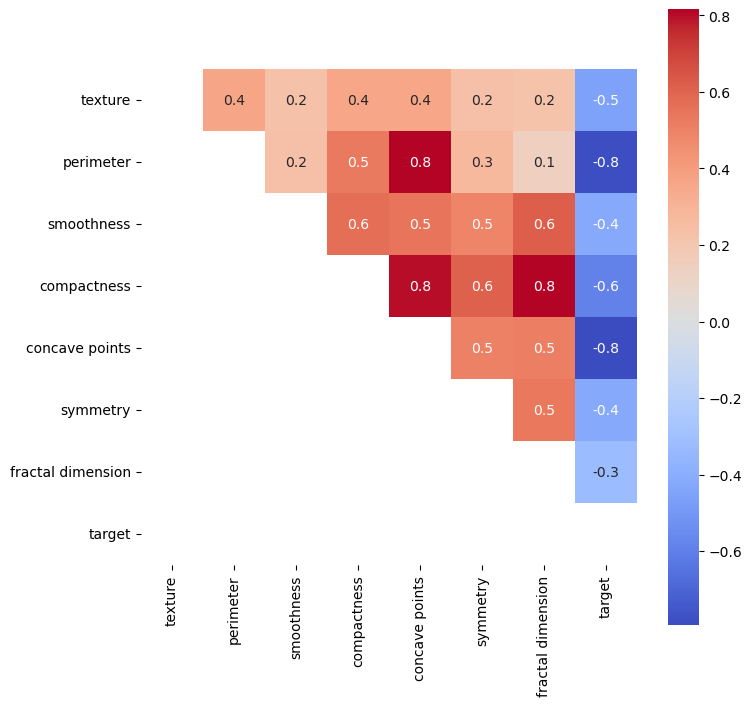

In [20]:
# Lower Triangle
Upper_Triangle = np.tril(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(8, 8))
sns.heatmap(corr, mask=Upper_Triangle, annot=True, fmt='.1f', cmap='coolwarm', square=True)
plt.show()

In [21]:
df.isnull().sum() # check for null data in coulmns and good for data be zero

texture              0
perimeter            0
smoothness           0
compactness          0
concave points       0
symmetry             0
fractal dimension    0
target               0
dtype: int64

In [22]:
df.describe()

,texture,perimeter,smoothness,compactness,concave points,symmetry,fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,25.677223,107.261213,0.132369,0.254265,0.114606,0.290076,0.083946,0.627417
std,6.146258,33.602542,0.022832,0.157336,0.065732,0.061867,0.018061,0.483918
min,12.020000,50.410000,0.071170,0.027290,0.000000,0.156500,0.055040,0.000000
25%,21.080000,84.110000,0.116600,0.147200,0.064930,0.250400,0.071460,0.000000
50%,25.410000,97.660000,0.131300,0.211900,0.099930,0.282200,0.080040,1.000000
75%,29.720000,125.400000,0.146000,0.339100,0.161400,0.317900,0.092080,1.000000
max,49.540000,251.200000,0.222600,1.058000,0.291000,0.663800,0.207500,1.000000


In [23]:
df[df['target'] == 0].describe()

,texture,perimeter,smoothness,compactness,concave points,symmetry,fractal dimension,target
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.0
mean,29.318208,141.370330,0.144845,0.374824,0.182237,0.323468,0.091530,0.0
std,5.434804,29.457055,0.021870,0.170372,0.046308,0.074685,0.021553,0.0
min,16.670000,85.100000,0.088220,0.051310,0.028990,0.156500,0.055040,0.0
25%,25.782500,119.325000,0.130475,0.244475,0.152750,0.276500,0.076302,0.0
50%,28.945000,138.000000,0.143450,0.356350,0.182000,0.310300,0.087600,0.0
75%,32.690000,159.800000,0.155975,0.447850,0.210675,0.359225,0.102625,0.0
max,49.540000,251.200000,0.222600,1.058000,0.291000,0.663800,0.207500,0.0


In [24]:
df[df['target'] == 1].describe()

,texture,perimeter,smoothness,compactness,concave points,symmetry,fractal dimension,target
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.0
mean,23.515070,87.005938,0.124959,0.182673,0.074444,0.270246,0.079442,1.0
std,5.493955,13.527091,0.020013,0.092180,0.035797,0.041745,0.013804,0.0
min,12.020000,50.410000,0.071170,0.027290,0.000000,0.156600,0.055210,1.0
25%,19.580000,78.270000,0.110400,0.112000,0.051040,0.240600,0.070090,1.0
50%,22.820000,86.920000,0.125400,0.169800,0.074310,0.268700,0.077120,1.0
75%,26.510000,96.590000,0.137600,0.230200,0.097490,0.298300,0.085410,1.0
max,41.780000,127.100000,0.200600,0.584900,0.175000,0.422800,0.148600,1.0


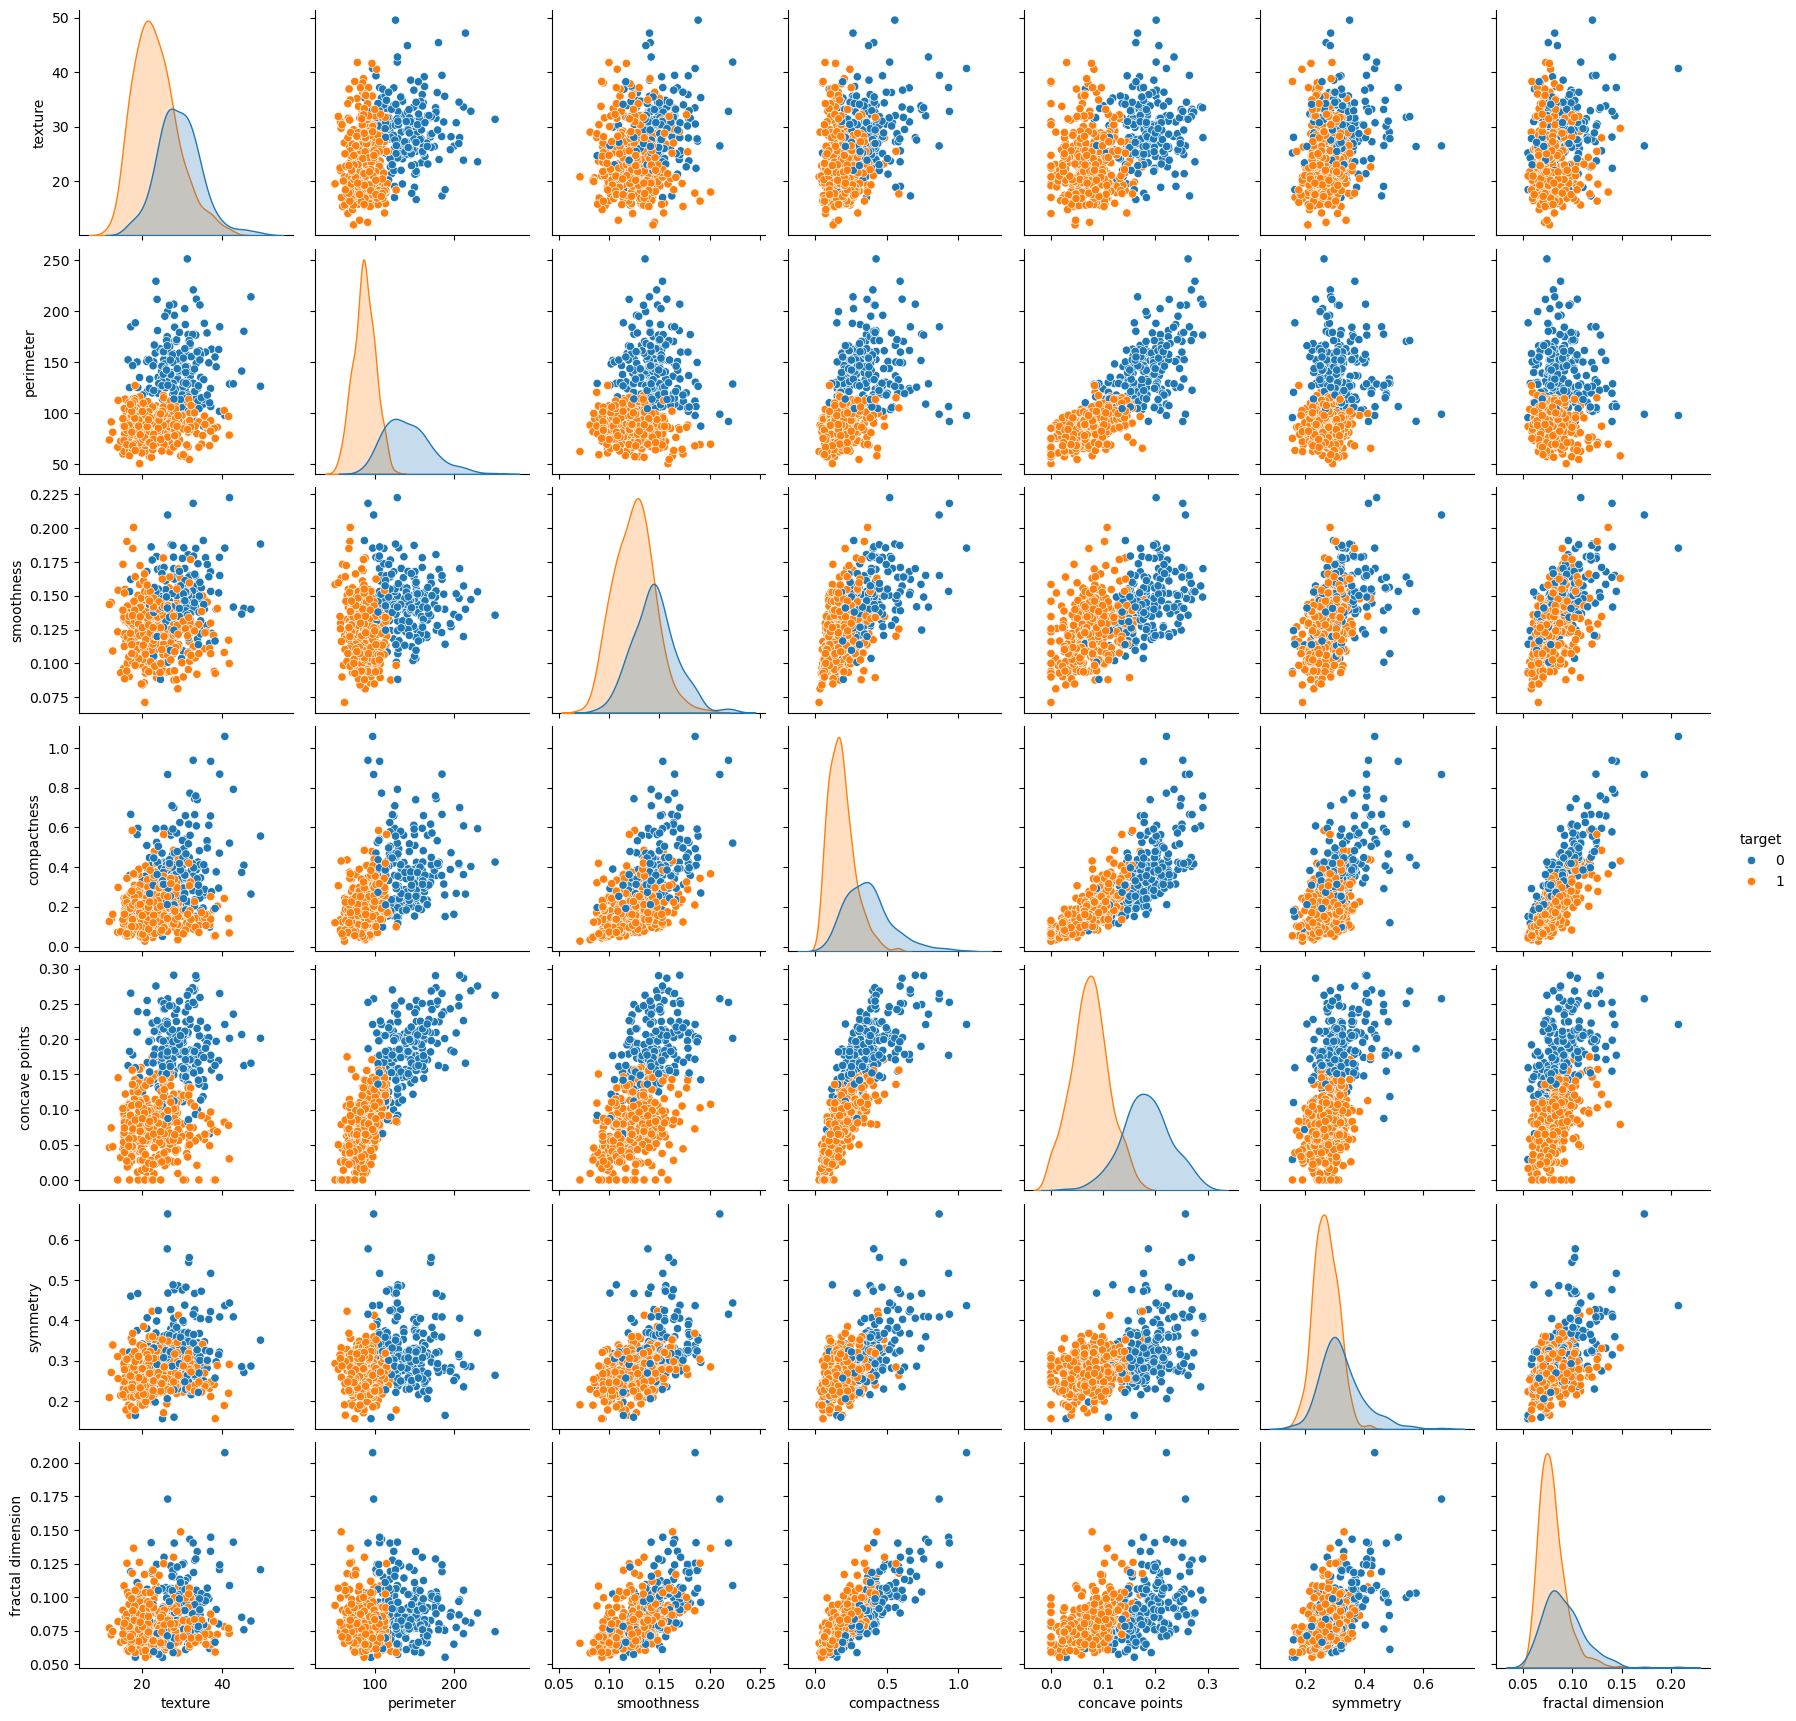

In [25]:
sns.pairplot(df, hue='target')
plt.show()

In [26]:
df.abs() # ghadr motlagh

,texture,perimeter,smoothness,compactness,concave points,symmetry,fractal dimension,target
0,17.33,184.60,0.16220,0.66560,0.2654,0.4601,0.11890,0
1,23.41,158.80,0.12380,0.18660,0.1860,0.2750,0.08902,0
2,25.53,152.50,0.14440,0.42450,0.2430,0.3613,0.08758,0
3,26.50,98.87,0.20980,0.86630,0.2575,0.6638,0.17300,0
4,16.67,152.20,0.13740,0.20500,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...
564,26.40,166.10,0.14100,0.21130,0.2216,0.2060,0.07115,0
565,38.25,155.00,0.11660,0.19220,0.1628,0.2572,0.06637,0
566,34.12,126.70,0.11390,0.30940,0.1418,0.2218,0.07820,0
567,39.42,184.60,0.16500,0.86810,0.2650,0.4087,0.12400,0


In [27]:
c = df.corr()['target'].drop('target')
feature_sort = c.abs().sort_values(ascending=False).index.tolist()
feature_sort

['concave points',
 'perimeter',
 'compactness',
 'texture',
 'smoothness',
 'symmetry',
 'fractal dimension']

In [28]:
df[feature_sort]

,concave points,perimeter,compactness,texture,smoothness,symmetry,fractal dimension
0,0.2654,184.60,0.66560,17.33,0.16220,0.4601,0.11890
1,0.1860,158.80,0.18660,23.41,0.12380,0.2750,0.08902
2,0.2430,152.50,0.42450,25.53,0.14440,0.3613,0.08758
3,0.2575,98.87,0.86630,26.50,0.20980,0.6638,0.17300
4,0.1625,152.20,0.20500,16.67,0.13740,0.2364,0.07678
...,...,...,...,...,...,...,...
564,0.2216,166.10,0.21130,26.40,0.14100,0.2060,0.07115
565,0.1628,155.00,0.19220,38.25,0.11660,0.2572,0.06637
566,0.1418,126.70,0.30940,34.12,0.11390,0.2218,0.07820
567,0.2650,184.60,0.86810,39.42,0.16500,0.4087,0.12400


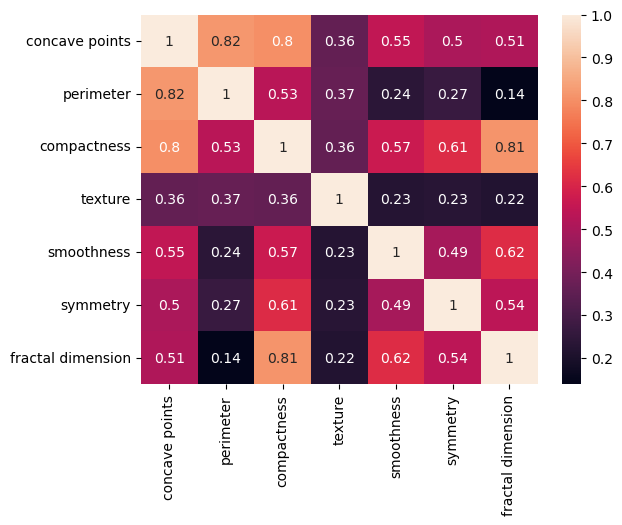

In [29]:
sns.heatmap(df[feature_sort].corr(), annot=True)
plt.show()

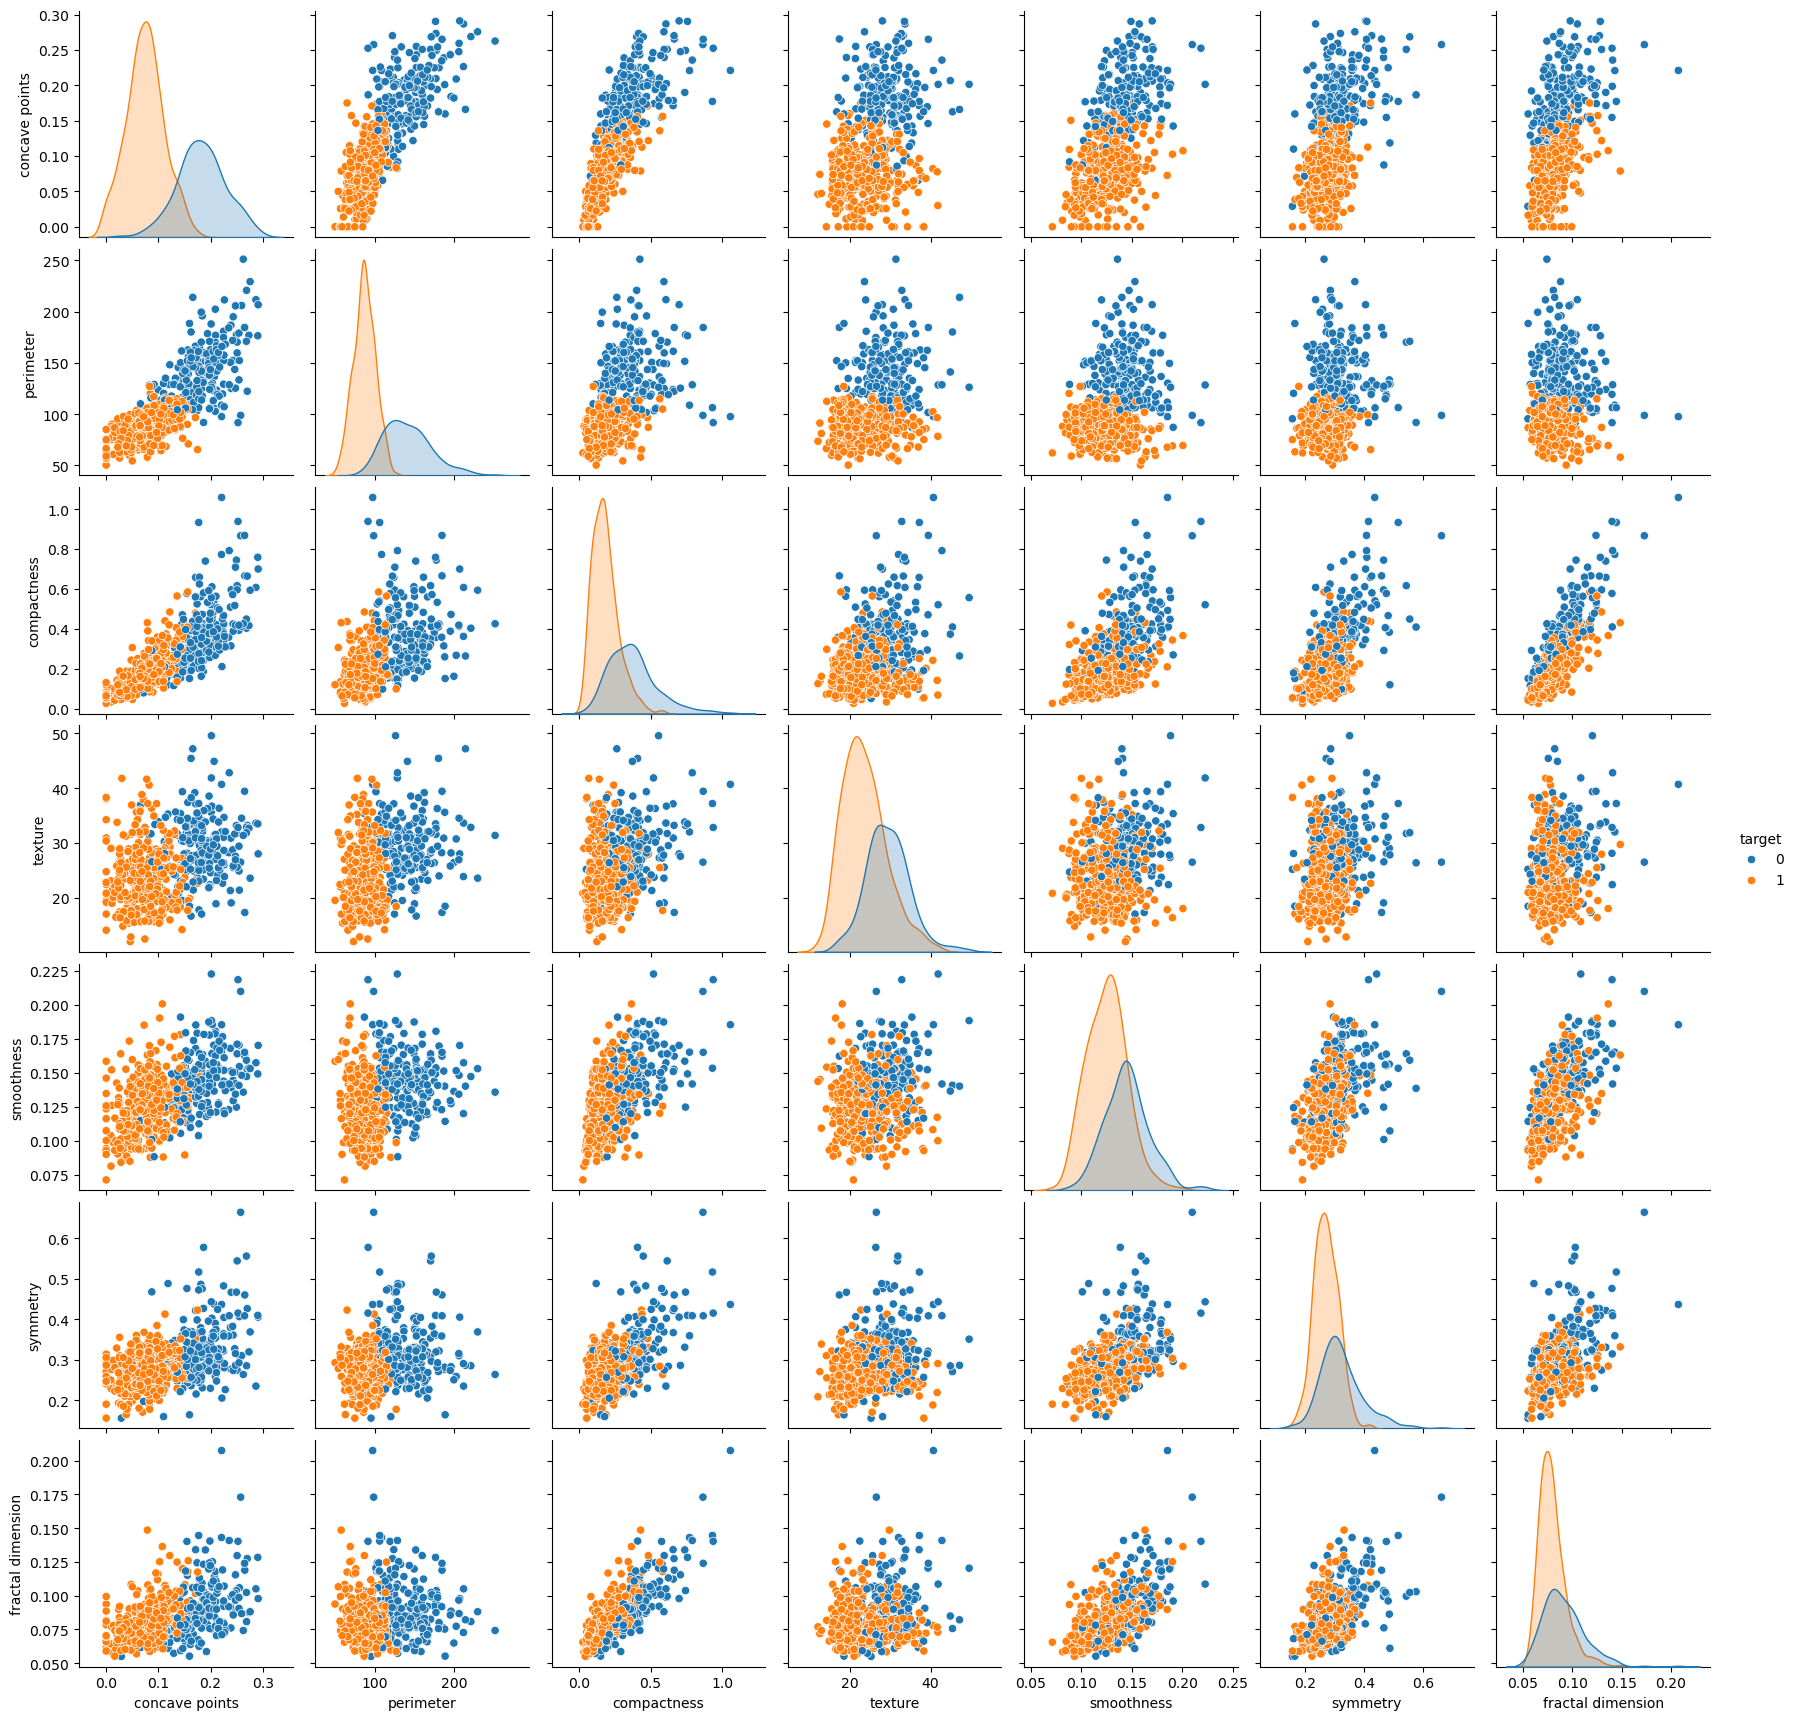

In [30]:
dfs = df[feature_sort + ['target']]
sns.pairplot(dfs, hue='target')
plt.show()

In [31]:
# 1.Data generation
X = breast_cancer.data
#print(X)
y = breast_cancer.target
#print(y)

In [32]:
# 2. split data(80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape

(455, 30)

In [33]:
X_test.shape

(114, 30)

In [34]:
# 3. train linear regression model
model  = LogisticRegression(random_state=42, solver='liblinear')
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [35]:
# predictions
y_pred = model.predict(X_test)
y_pred.shape

(114,)

In [36]:
confusion_matrix(y_test, y_pred) # count 

array([[39,  4],
       [ 1, 70]])

In [ ]:
accuracy_score(y_test, y_pred) #

In [ ]:
precision_score(y_test, y_pred) #

In [ ]:
recall_score(y_test, y_pred) #